In [9]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
from wettbewerb import load_references, get_3montages
import mne
from scipy import signal as sig
import preprocess
import features

In [3]:
training_folder = "../shared_data/training_mini"
ids, channels, data, sampling_frequencies, reference_systems, eeg_labels = load_references(training_folder)

100	 Dateien wurden geladen.


In [4]:
import GNN_dataset
from GNN_dataset import create_graphs
create_graphs(ids,channels,data,sampling_frequencies,reference_systems,eeg_labels)

create_graphs() was called
label_list type: <class 'list'>
label_list[0]: (1, 36.8868, 237.2101)

--- Graph 0 ---
ID: aaaaaaac_s001_t000
Label tuple: (1, 36.8868, 237.2101)
Assigned label: 1 (1)
Processed: aaaaaaac_s001_t000

--- Graph 1 ---
ID: aaaaaaac_s001_t001
Label tuple: (1, 12.0764, 200.3233)
Assigned label: 1 (1)
Processed: aaaaaaac_s001_t001

--- Graph 2 ---
ID: aaaaaaac_s002_t000
Label tuple: (1, 16.0173, 218.0379)
Assigned label: 1 (1)
Processed: aaaaaaac_s002_t000

--- Graph 3 ---
ID: aaaaaaac_s004_t000
Label tuple: (0, 0.0, 0.0)
Assigned label: 0 (0)
Processed: aaaaaaac_s004_t000

--- Graph 4 ---
ID: aaaaaaac_s004_t002
Label tuple: (0, 0.0, 0.0)
Assigned label: 0 (0)
Processed: aaaaaaac_s004_t002

--- Graph 5 ---
ID: aaaaaaac_s005_t000
Label tuple: (0, 0.0, 0.0)
Assigned label: 0 (0)
Processed: aaaaaaac_s005_t000

--- Graph 6 ---
ID: aaaaaaac_s005_t001
Label tuple: (0, 0.0, 0.0)
Assigned label: 0 (0)
Processed: aaaaaaac_s005_t001

--- Graph 7 ---
ID: aaaaaaac_s005_t002
Lab

[Data(x=[12, 12], edge_index=[2, 132], y=1),
 Data(x=[12, 12], edge_index=[2, 132], y=1),
 Data(x=[12, 12], edge_index=[2, 132], y=1),
 Data(x=[12, 12], edge_index=[2, 132], y=0),
 Data(x=[12, 12], edge_index=[2, 132], y=0),
 Data(x=[12, 12], edge_index=[2, 132], y=0),
 Data(x=[12, 12], edge_index=[2, 132], y=0),
 Data(x=[12, 12], edge_index=[2, 132], y=0),
 Data(x=[12, 12], edge_index=[2, 132], y=0),
 Data(x=[12, 12], edge_index=[2, 132], y=0),
 Data(x=[12, 12], edge_index=[2, 132], y=0),
 Data(x=[12, 12], edge_index=[2, 132], y=0),
 Data(x=[12, 12], edge_index=[2, 132], y=1),
 Data(x=[12, 12], edge_index=[2, 132], y=0),
 Data(x=[12, 12], edge_index=[2, 132], y=0),
 Data(x=[12, 12], edge_index=[2, 132], y=0),
 Data(x=[12, 12], edge_index=[2, 132], y=0),
 Data(x=[12, 12], edge_index=[2, 132], y=1),
 Data(x=[12, 12], edge_index=[2, 132], y=0),
 Data(x=[12, 12], edge_index=[2, 132], y=0),
 Data(x=[12, 12], edge_index=[2, 132], y=0),
 Data(x=[12, 12], edge_index=[2, 132], y=0),
 Data(x=[1

/home/jupyter-wki_team_3/wki-sose25/ipykernel_166092/2307515014.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load(dataset_path)


Dataset geladen
Label distribution: Counter({0: 64, 1: 36})
Epoch 01 | Loss: 0.6440 | Test Acc: 0.5500
Epoch 02 | Loss: 0.6511 | Test Acc: 0.5500
Epoch 03 | Loss: 0.6437 | Test Acc: 0.5500
Epoch 04 | Loss: 0.6508 | Test Acc: 0.5500
Epoch 05 | Loss: 0.6226 | Test Acc: 0.5500
Epoch 06 | Loss: 0.6366 | Test Acc: 0.5500
Epoch 07 | Loss: 0.6437 | Test Acc: 0.5500
Epoch 08 | Loss: 0.6436 | Test Acc: 0.5500
Epoch 09 | Loss: 0.6506 | Test Acc: 0.5500
Epoch 10 | Loss: 0.6439 | Test Acc: 0.5500
Epoch 11 | Loss: 0.6435 | Test Acc: 0.5500
Epoch 12 | Loss: 0.6503 | Test Acc: 0.5500
Epoch 13 | Loss: 0.6503 | Test Acc: 0.5500
Epoch 14 | Loss: 0.6368 | Test Acc: 0.5500
Epoch 15 | Loss: 0.6368 | Test Acc: 0.5500
Epoch 16 | Loss: 0.6368 | Test Acc: 0.5500
Epoch 17 | Loss: 0.6368 | Test Acc: 0.5500
Epoch 18 | Loss: 0.6503 | Test Acc: 0.5500
Epoch 19 | Loss: 0.6367 | Test Acc: 0.5500
Epoch 20 | Loss: 0.6300 | Test Acc: 0.5500
Epoch 21 | Loss: 0.6437 | Test Acc: 0.5500
Epoch 22 | Loss: 0.6297 | Test Acc: 0

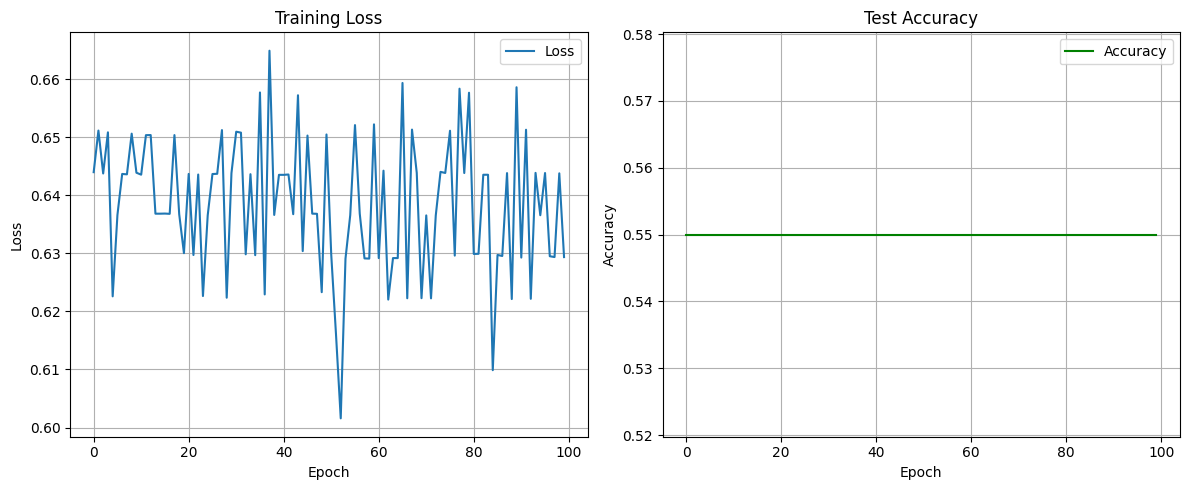

In [6]:
import torch
from torch.utils.data import random_split
from torch_geometric.data import DataLoader
from collections import Counter
dataset_path = "dataset.pt"
if not os.path.exists(dataset_path):
    raise FileNotFoundError("Run GNN_dataset.py, um Dataset zu erstellen")
    
dataset = torch.load(dataset_path)
print("Dataset geladen")
labels = [int(graph.y.item()) for graph in dataset]
print("Label distribution:", Counter(labels))

# Train Test split the Data 
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
torch.manual_seed(42)
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size =32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size =32, shuffle = False)

import GNN_model
num_epochs = 100
losses = []
accuracies = []
for epoch in range(1, num_epochs +1):
    loss = GNN_model.train_model(train_loader)
    acc = GNN_model.evaluate_model(test_loader)
    losses.append(loss)
    accuracies.append(acc)
    print(f"Epoch {epoch:02d} | Loss: {loss:.4f} | Test Acc: {acc:.4f}")

plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
import GNN_model
num_epochs = 100
losses = []
accuracies = []
for epoch in range(1, num_epochs +1):
    loss = GNN_model.train_model(train_loader)
    acc = GNN_model.evaluate_model(test_loader)
    losses.append(loss)
    accuracies.append(acc)
    print(f"Epoch {epoch:02d} | Loss: {loss:.4f} | Test Acc: {acc:.4f}")

Epoch 01 | Loss: 0.6293 | Test Acc: 0.5500
Epoch 02 | Loss: 0.6366 | Test Acc: 0.5500
Epoch 03 | Loss: 0.6365 | Test Acc: 0.5500
Epoch 04 | Loss: 0.6366 | Test Acc: 0.5500
Epoch 05 | Loss: 0.6439 | Test Acc: 0.5500
Epoch 06 | Loss: 0.6293 | Test Acc: 0.5500
Epoch 07 | Loss: 0.6513 | Test Acc: 0.5500
Epoch 08 | Loss: 0.6438 | Test Acc: 0.5500
Epoch 09 | Loss: 0.6510 | Test Acc: 0.5500
Epoch 10 | Loss: 0.6652 | Test Acc: 0.5500
Epoch 11 | Loss: 0.6435 | Test Acc: 0.5500
Epoch 12 | Loss: 0.6368 | Test Acc: 0.5500
Epoch 13 | Loss: 0.6302 | Test Acc: 0.5500
Epoch 14 | Loss: 0.6503 | Test Acc: 0.5500
Epoch 15 | Loss: 0.6370 | Test Acc: 0.5500
Epoch 16 | Loss: 0.6435 | Test Acc: 0.5500
Epoch 17 | Loss: 0.6368 | Test Acc: 0.5500
Epoch 18 | Loss: 0.6708 | Test Acc: 0.5500
Epoch 19 | Loss: 0.6368 | Test Acc: 0.5500
Epoch 20 | Loss: 0.6502 | Test Acc: 0.5500
Epoch 21 | Loss: 0.6372 | Test Acc: 0.5500
Epoch 22 | Loss: 0.6370 | Test Acc: 0.5500
Epoch 23 | Loss: 0.6172 | Test Acc: 0.5500
Epoch 24 | 